In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.colors as cores

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import seaborn as sns

from statsmodels.tsa.stattools import grangercausalitytests as gc_test

/home/ryuga/anaconda3/envs/PDS/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
data_path = '/home/ryuga/Dropbox/database/dbv3/'
data_parser = lambda dates: pd.to_datetime(dates, unit='h')
sim_df = pd.read_csv(data_path + 'data/simout_14.csv', index_col='tout', parse_dates=['tout'], date_parser=data_parser)
sim_df.head()

,xmeas1,xmeas2,xmeas3,xmeas4,xmeas5,xmeas6,xmeas7,xmeas8,xmeas9,xmeas10,...,xmeas32,xmeas33,xmeas34,xmeas35,xmeas36,xmeas37,xmeas38,xmeas39,xmeas40,xmeas41
tout,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,0.895836,16.137401,5.396131,6.675361,3.264531,0.010715,0.574717,0.186136,53.763098,43.985723
1970-01-01 00:00:36,0.271854,3689.335983,4444.457491,9.252574,32.181103,47.771091,2799.108851,64.357595,122.892692,0.196082,...,0.895836,16.137401,5.396131,6.675361,3.264531,0.010715,0.574717,0.186136,53.763098,43.985723
1970-01-01 00:01:12,0.271240,3645.222439,4444.585389,9.210965,32.626982,47.648657,2798.964034,63.644355,122.918317,0.197222,...,0.895836,16.137401,5.396131,6.675361,3.264531,0.010715,0.574717,0.186136,53.763098,43.985723
1970-01-01 00:01:48,0.270623,3653.224156,4459.600050,9.314207,32.492805,47.578617,2798.605420,64.829800,122.916964,0.195026,...,0.895836,16.137401,5.396131,6.675361,3.264531,0.010715,0.574717,0.186136,53.763098,43.985723
1970-01-01 00:02:24,0.271336,3668.223751,4486.720169,9.247881,32.295343,47.595052,2799.243255,64.585296,122.902800,0.200729,...,0.895836,16.137401,5.396131,6.675361,3.264531,0.010715,0.574717,0.186136,53.763098,43.985723


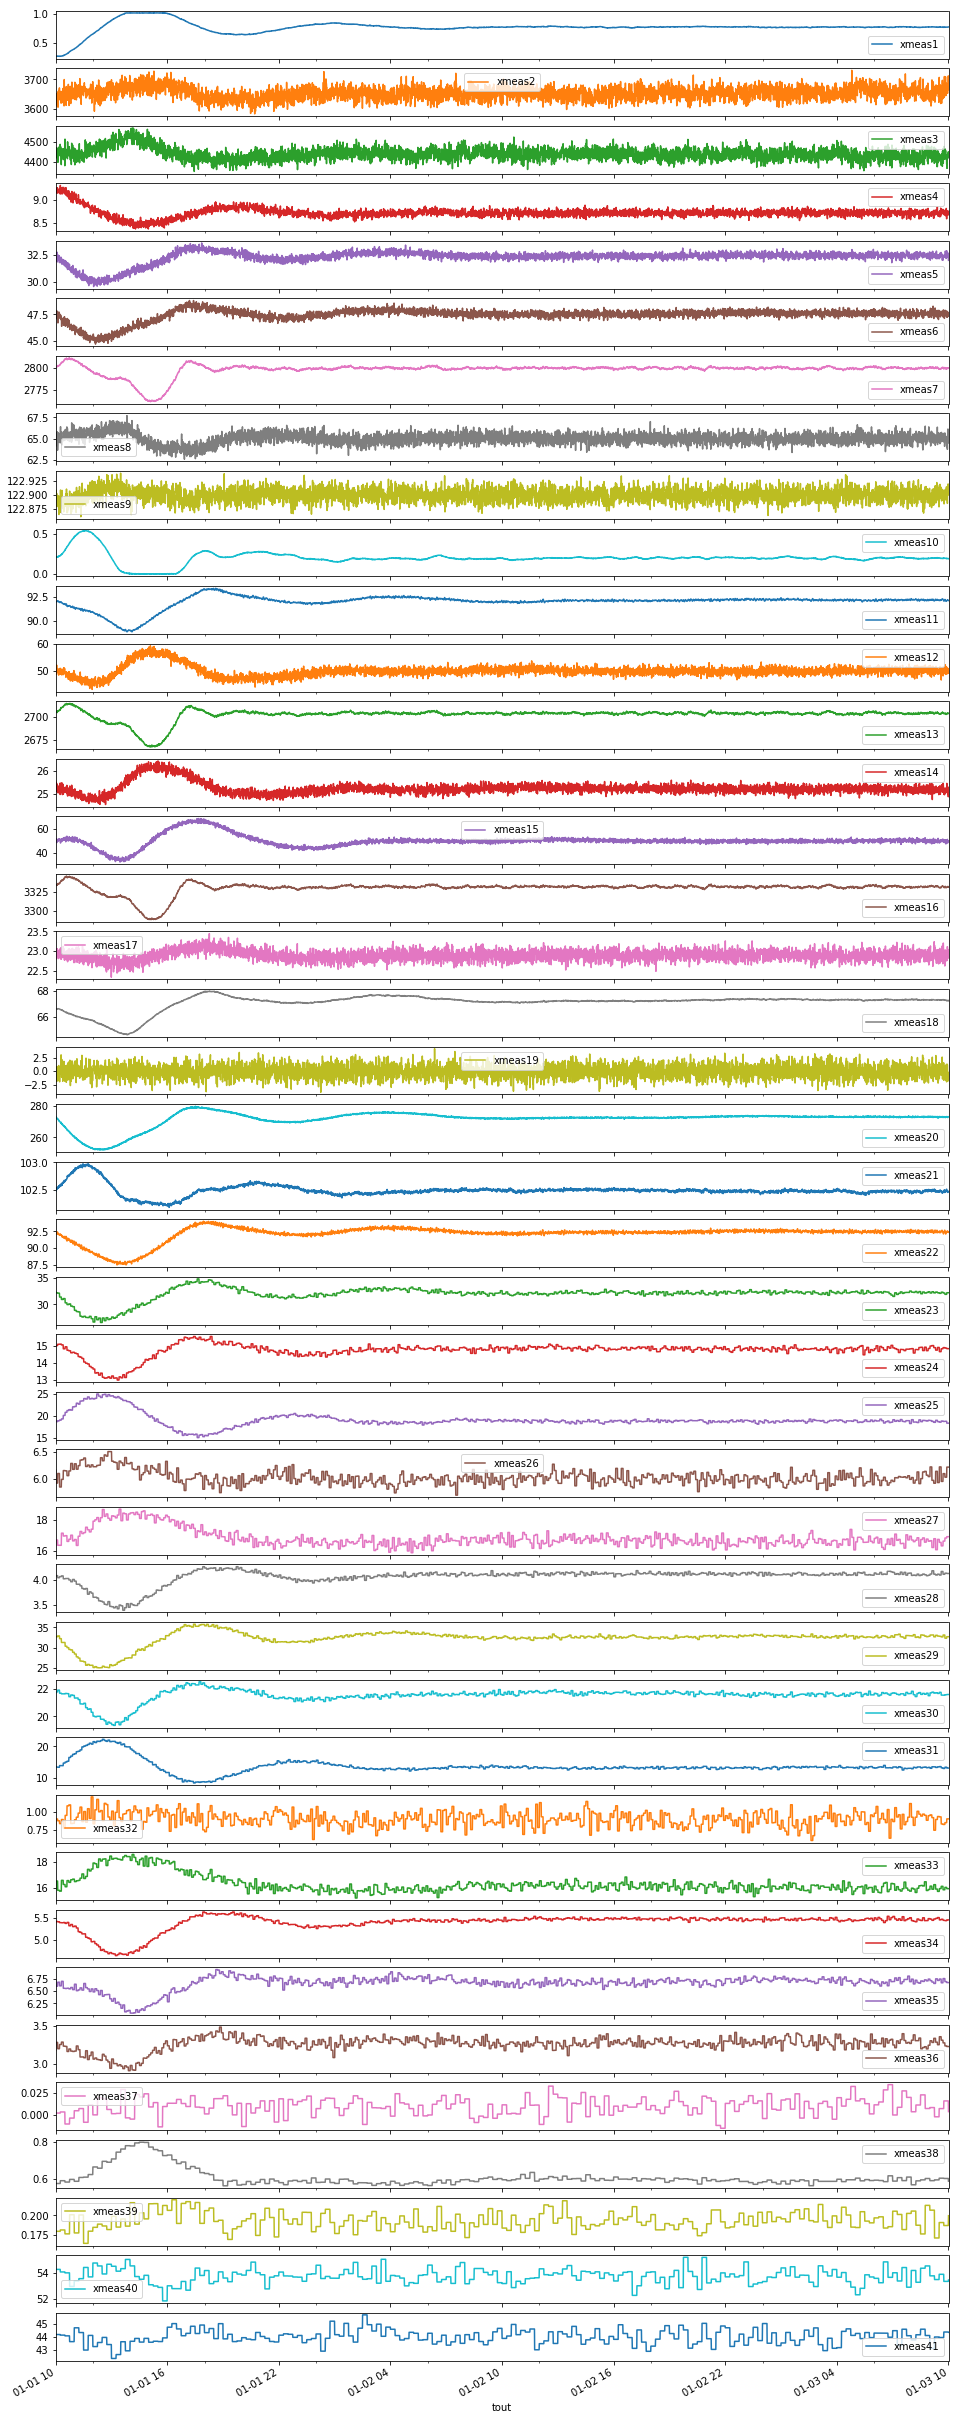

In [103]:
sim_df.iloc[1000:].plot(subplots=True, figsize=(16, 48))
plt.show()

In [104]:
c = gc_test(sim_df[['xmeas1', 'xmeas4']], maxlag=200, verbose=False)

In [42]:
k = 3
print(c[1][0])
for i in c:
    if c[i][0]['params_ftest'][1] < .05:
        print(i)
        print(c[i][0]['params_ftest'])
        if c[i][0]['params_ftest'][0] > 

{'ssr_ftest': (95.774085709373921, 1.919929012020866e-22, 5797.0, 1), 'ssr_chi2test': (95.823649666097765, 1.2558648628093857e-22, 1), 'lrtest': (95.040694988550968, 1.8651140391872861e-22, 1), 'params_ftest': (95.774085709259296, 1.9199290121299876e-22, 5797.0, 1)}
1
(95.774085709259296, 1.9199290121299876e-22, 5797.0, 1)
2
(56.660350431499445, 4.2684304038238969e-25, 5794.0, 2)
3
(35.068757062118287, 1.8748346387952717e-22, 5791.0, 3)
4
(24.945412004166808, 1.6470259374335094e-20, 5788.0, 4)
5
(18.75847531451144, 1.5249996519984773e-18, 5785.0, 5)
6
(15.1595917986921, 2.6492905154439063e-17, 5782.0, 6)
7
(14.041981958009922, 3.5232414741213999e-18, 5779.0, 7)
8
(13.504116317016944, 1.5071182928726781e-19, 5776.0, 8)
9
(13.751853815477482, 4.0466450291482122e-22, 5773.0, 9)
10
(14.400275981451056, 1.4005901826954089e-25, 5770.0, 10)
11
(14.929802647710629, 5.0567364460663539e-29, 5767.0, 11)
12
(15.900314589276912, 1.0273982203496156e-33, 5764.0, 12)
13
(16.640029007561758, 3.56689316

In [143]:
# x = np.array([[i, c[i][0]['params_ftest'][0]] for i in c if c[i][0]['params_ftest'][1] < .01])
x = np.array([[i, c[i][0]['params_ftest'][1]] for i in c])
x
# markerline, stemlines, baseline = plt.stem(x[:, 0],x[:, 1], '--k', markerfmt='b.')
# plt.setp(baseline, 'color', 'black', 'linewidth', 2)
# plt.setp(stemlines, 'color', cores.to_rgba('black', .5))
# plt.setp(markerline, 'color', cores.to_rgba(plt.getp(markerline, 'color'), .5))
# plt.show()
# plt.plot(x[:,1])
# plt.show()

array([[  1.00000000e+00,   1.19927288e-09],
       [  2.00000000e+00,   3.73585800e-17],
       [  3.00000000e+00,   3.53607582e-19],
       [  4.00000000e+00,   2.59761766e-12],
       [  5.00000000e+00,   1.29905750e-07],
       [  6.00000000e+00,   1.66005380e-04],
       [  7.00000000e+00,   1.33481218e-02],
       [  8.00000000e+00,   1.37124723e-01],
       [  9.00000000e+00,   2.74246208e-02],
       [  1.00000000e+01,   5.65549051e-02],
       [  1.10000000e+01,   8.18113510e-02],
       [  1.20000000e+01,   1.11278196e-01],
       [  1.30000000e+01,   1.56350708e-01],
       [  1.40000000e+01,   2.35634271e-01],
       [  1.50000000e+01,   1.62177396e-01],
       [  1.60000000e+01,   2.19120271e-01],
       [  1.70000000e+01,   2.78684246e-01],
       [  1.80000000e+01,   2.87969623e-01],
       [  1.90000000e+01,   3.41665016e-01],
       [  2.00000000e+01,   3.17456729e-01],
       [  2.10000000e+01,   8.32420962e-02],
       [  2.20000000e+01,   1.18717382e-01],
       [  

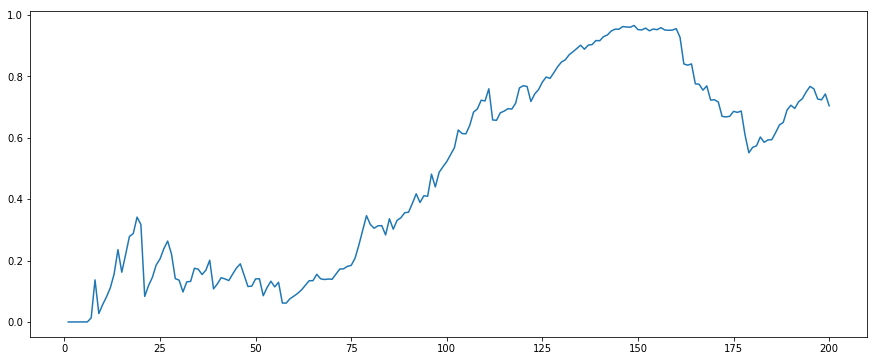

148


In [165]:
x = [c[i][0]['params_ftest'][1] for i in c]

plt.plot(np.arange(1, 201), x)
plt.show()
print(np.argmax(x))

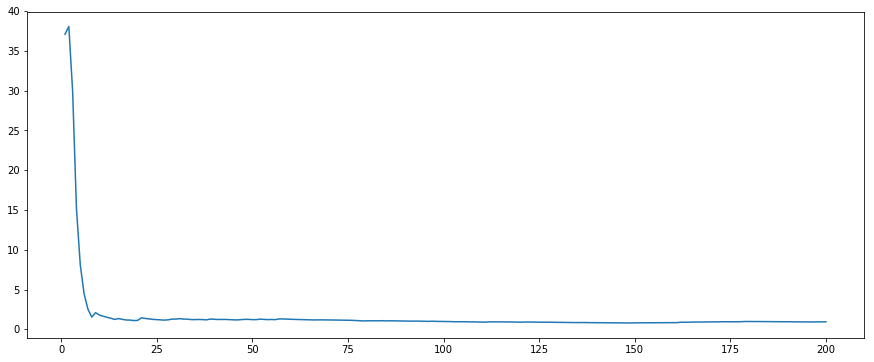

1


In [166]:
x = [c[i][0]['params_ftest'][0] for i in c]

plt.plot(np.arange(1, 201), x)
plt.show()
print(np.argmax(x))

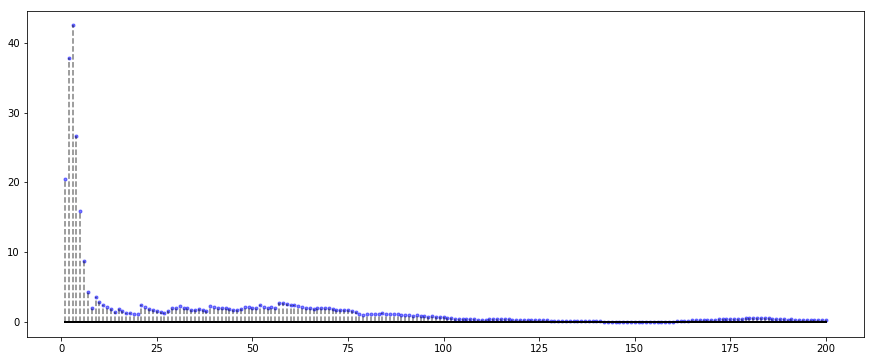

In [164]:
x = [- np.log(c[i][0]['params_ftest'][1]) for i in c]

markerline, stemlines, baseline = plt.stem(np.arange(1, 201), x , '--k', markerfmt='b.')
plt.setp(baseline, 'color', 'black', 'linewidth', 2)
plt.setp(stemlines, 'color', cores.to_rgba('black', .5))
plt.setp(markerline, 'color', cores.to_rgba(plt.getp(markerline, 'color'), .5))
plt.show()

In [ ]:
np.array((41, 41), dtype='object')

In [ ]:
test_statistic = pd.Series(data=[cv[0]['params_ftest'][0] for cv in c.values()], index=c.keys())
lags = [c[k][0]['params_ftest'][1] < .01 for k in c.keys()]
mi = test_statistic[lags].mean()
sigma = test_statistic[lags].std()r

test_statistic[lags & (test_statistic > mi + 1*sigma)]


In [10]:
gc_mat = np.zeros((41, 41), dtype='object')
k = 1
for i in range(4):
    for j in range(4):
        gc_res = gc_test(sim_df[['xmeas' + str(j + 1), 'xmeas' + str(i + 1)]], maxlag=200, verbose=False)
        
        test_statistic = pd.Series(data=[gc[0]['params_ftest'][0] for gc in gc_res.values()], index=gc_res.keys())
        lags = [gc[0]['params_ftest'][1] < .01 for gc in gc_res.values()]
        mi = test_statistic[lags].mean()
        sigma = test_statistic[lags].std()
        gc_mat[i, j] = test_statistic[lags & (test_statistic > mi + k*sigma)]

In [17]:
gc_mat[0:4,0:4]


array([[ 1     7.802577e+07
2     4.229504e+07
3     2.841284e+07
4     2.231421e+07
5     1.865776e+07
6     1.619912e+07
7     1.435744e+07
8     1.287941e+07
9     1.151538e+07
10    1.044278e+07
dtype: float64,
        1    98.342644
2    35.601204
3    17.025386
dtype: float64,
        Series([], dtype: float64),
        1    4527.473413
2    1054.777664
3     455.709659
dtype: float64],
       [Series([], dtype: float64),
        1     292.317946
2     241.125808
3     224.997382
4     190.500483
5     167.321349
6     156.130004
7     139.489241
8     127.850877
9     119.063847
10    110.412910
11    103.820527
12     96.105161
13     89.306591
14     84.015050
15     78.667041
16     74.328299
17     70.831922
dtype: float64,
        1    27.332761
2    15.689644
dtype: float64,
        Series([], dtype: float64)],
       [1    35.325101
2    37.734342
dtype: float64,
        1    40.982523
2    22.357813
3    10.786570
4     7.209946
dtype: float64,
        1     1157.934575
